In [107]:
import pandas
import numpy
import math

import matplotlib
from matplotlib import pyplot

import seaborn

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

pandas.set_option('display.max_columns', 100)

In [108]:
#load csv
bank_full_data_frame = pandas.read_csv('data/bank-additional-full.csv', sep=';')

In [109]:
len(bank_full_data_frame)

41188

In [110]:
bank_full_data_frame.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [111]:
bank_full_data_frame.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [112]:
bank_full_data_frame.count() / len(bank_full_data_frame)

age               1.0
job               1.0
marital           1.0
education         1.0
default           1.0
housing           1.0
loan              1.0
contact           1.0
month             1.0
day_of_week       1.0
duration          1.0
campaign          1.0
pdays             1.0
previous          1.0
poutcome          1.0
emp.var.rate      1.0
cons.price.idx    1.0
cons.conf.idx     1.0
euribor3m         1.0
nr.employed       1.0
y                 1.0
dtype: float64

In [113]:
bank_full_data_frame.apply(lambda column:\
    column.apply(lambda value: value == 'unknown').sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [114]:
bank_full_data_frame.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [115]:
bank_full_data_frame['y'].value_counts() / len(bank_full_data_frame)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [116]:
bank_full_group_by_y = bank_full_data_frame.groupby(by='y')

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

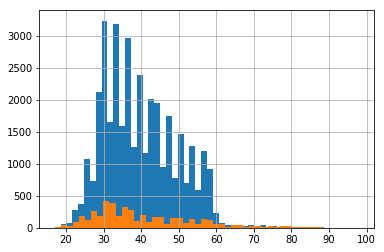

In [117]:
bank_full_group_by_y['age'].hist(bins=50)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

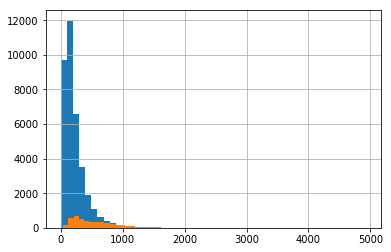

In [118]:
bank_full_group_by_y['duration'].hist(bins=50)

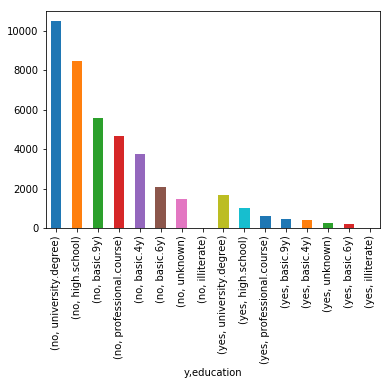

In [119]:
bank_full_group_by_y['education'].value_counts().plot(kind= 'bar')

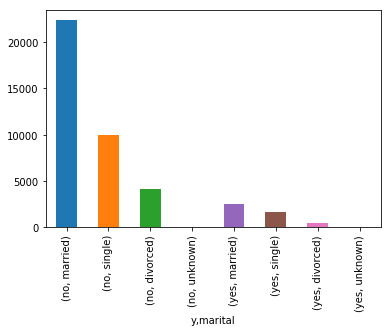

In [120]:
bank_full_group_by_y['marital'].value_counts().plot(kind= 'bar')

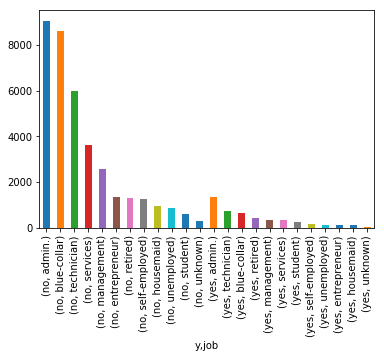

In [121]:
bank_full_group_by_y['job'].value_counts().plot(kind= 'bar')

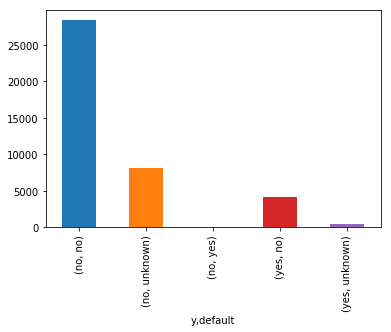

In [122]:
bank_full_group_by_y['default'].value_counts().plot.bar()

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: campaign, dtype: object

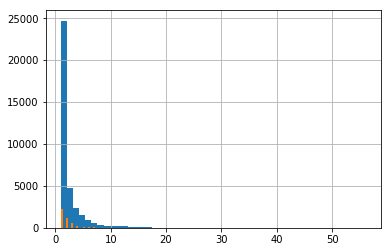

In [123]:
bank_full_group_by_y['campaign'].hist(bins=50)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: previous, dtype: object

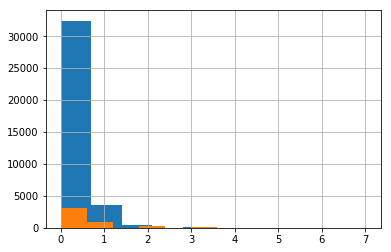

In [124]:
bank_full_group_by_y['previous'].hist(bins=10)

In [128]:
#feature engineering
transformed_bank_full_data_frame = bank_full_data_frame.copy(deep=True)
transformed_bank_full_data_frame['y'] = bank_full_data_frame['y'].apply(lambda value: 1 if value == 'yes' else 0)
bank_full_data_frame_one_hot = pandas.get_dummies(transformed_bank_full_data_frame)

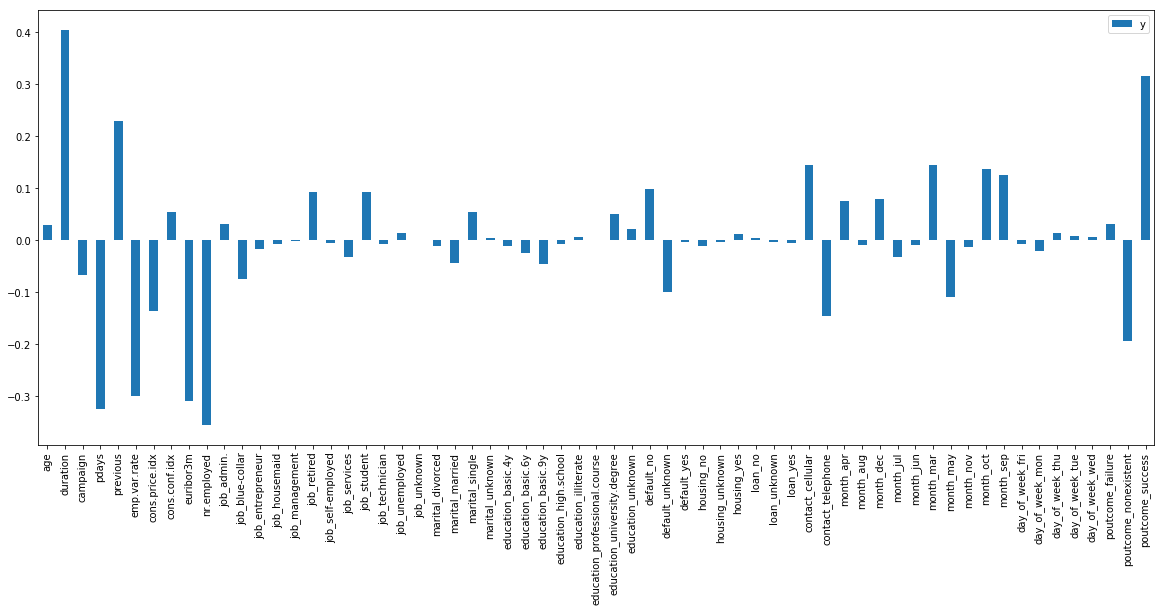

In [130]:
f,ax = pyplot.subplots(figsize=(20, 8))
bank_full_data_frame_one_hot.corr()[['y']].drop('y').plot.bar(ax=ax)